# Bias and Fairness
## Setup

In [1]:
import pandas as pd
import numpy as np
import pipeline
from pipeline import BiasCop

df = pd.read_csv('data/final_merged_df.csv')

splits = pipeline.split_last_year(df, colname='year_evictions')
cleaned_splits = [pipeline.clean_split(split) for split in splits]

labeled_splits = [pipeline.label(split, lower_bound=14, drop_column=False)
                  for split in cleaned_splits]

train_df, test_df = labeled_splits[-1]

/home/sinclairtarget/harris/ml/philly-evictions/.venv/lib/python3.7/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/sinclairtarget/harris/ml/philly-evictions/.venv/lib/python3.7/site-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)
/home/sinclairtarget/harris/ml/philly-evictions/.venv/lib/python3.7/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/sinclairtarget/harris/ml/philly-evictions/.venv/lib/python3.7/site-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)
/home/sinclairtarget/harris/ml/philly-evictions/.venv/lib/python3.7/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value enco

## Classifier Model

In [2]:
clf_pred_df = pipeline.run_one_clf(
    train_df,
    test_df,
    'DT',
    {},
    col_blacklist=['GEOID', 'year_evictions', 'evictions']
)

clf_cop = BiasCop(clf_pred_df)
clf_cop.xtabs()

model_id, score_thresholds 1 {'rank_abs': [190]}


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,...,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev
0,1,binary 0/1,190,majority_demo,af_am_alone,0.808511,0.968825,0.042654,0.146067,0.031175,...,0.174168,13,18,404,76,94,417,511,1336,0.183953
1,1,binary 0/1,190,majority_demo,hisp,0.600000,1.000000,0.037037,0.000000,0.000000,...,0.052632,0,2,52,3,5,52,57,1336,0.087719
2,1,binary 0/1,190,majority_demo,mixed,0.955224,0.953704,0.009615,0.189873,0.046296,...,0.202046,15,3,309,64,67,324,391,1336,0.171355
3,1,binary 0/1,190,majority_demo,white_alone,0.833333,0.988858,0.008380,0.210526,0.011142,...,0.050398,4,3,355,15,18,359,377,1336,0.047745


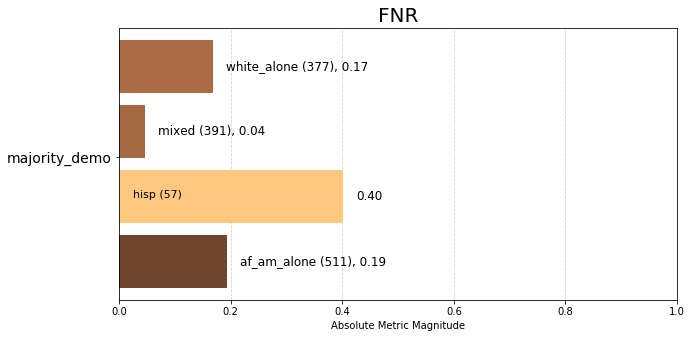

In [3]:
clf_cop.plot_group_metric('fnr')

get_disparity_predefined_group()


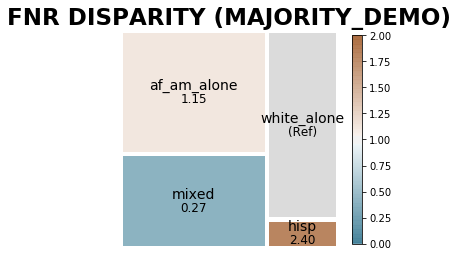

In [4]:
clf_cop.plot_disparity('fnr_disparity')

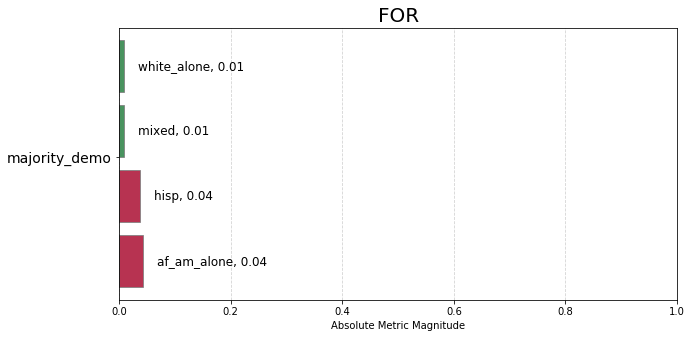

In [5]:
clf_cop.plot_fairness('for')

## Regression Model

In [6]:
reg_pred_df = pipeline.run_one_reg(
    train_df,
    test_df,
    'SVR',
    {},
    label_col='evictions',
    col_blacklist=['GEOID', 'year_evictions', 'label']
)

# Have to turn our predicted scores into a binary label
reg_pred_df = pipeline.label_df(
    reg_pred_df,
    14,
    label_col='pred_label',
    evictions_col='score'
)

reg_cop = BiasCop(reg_pred_df, score_col='pred_label')
reg_cop.xtabs()

/home/sinclairtarget/harris/ml/philly-evictions/.venv/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


model_id, score_thresholds 1 {'rank_abs': [142]}


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,...,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev
0,1,binary 0/1,142,majority_demo,af_am_alone,0.659574,0.971223,0.073227,0.162162,0.028777,...,0.144814,12,32,405,62,94,417,511,1336,0.183953
1,1,binary 0/1,142,majority_demo,hisp,0.400000,1.000000,0.054545,0.000000,0.000000,...,0.035088,0,3,52,2,5,52,57,1336,0.087719
2,1,binary 0/1,142,majority_demo,mixed,0.716418,0.978395,0.056548,0.127273,0.021605,...,0.140665,7,19,317,48,67,324,391,1336,0.171355
3,1,binary 0/1,142,majority_demo,white_alone,0.611111,1.000000,0.019126,0.000000,0.000000,...,0.029178,0,7,359,11,18,359,377,1336,0.047745


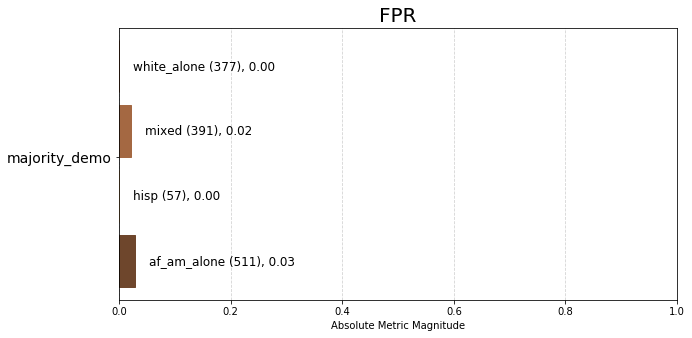

In [7]:
reg_cop.plot_group_metric('fpr')

get_disparity_predefined_group()


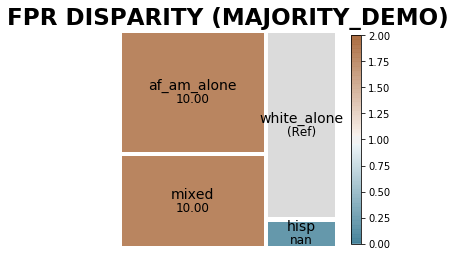

In [8]:
reg_cop.plot_disparity('fpr_disparity')

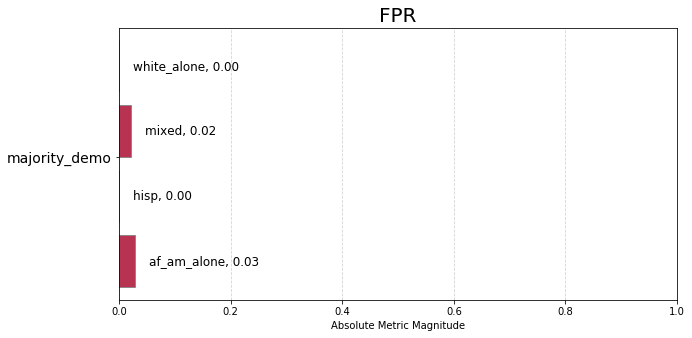

In [9]:
reg_cop.plot_fairness('fpr')